1. Covers basics of pytorch -> go through their official tutorials
2. breaks down what fastai cnn_learner is doing under the hood
  1. train_batch
  2. calculate gradient
  3. optimizer updates params
  4. check acc over validity set

3. how to write your own optimizer
4. plot accuracy plots
5. nn.Sequantial
6. universal approximation algorithm
7. role of relu

By the end of the lesson we took a dataset , wrote our own model & parts . Then replaced these parts with the parts which we saw in lesson 1/2


In [ ]:
from fastai.vision.all import *
matplotlib.rc('image', cmap='Greys')

In [ ]:
mnist_path = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = mnist_path

In [ ]:
(mnist_path/'testing/').ls().sorted()

(#10) [Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/7'),Path('testing/8'),Path('testing/9')]

In [ ]:
test_ds = []
train_ds = []

def populate(l,_path):
  for p in _path.ls().sorted():
    print(p)
    l.append([Image.open(x) for x in p.ls()])

In [ ]:
populate(train_ds,(mnist_path/'training/'))
populate(test_ds,(mnist_path/'testing/'))

/root/.fastai/data/mnist_png/training/0
/root/.fastai/data/mnist_png/training/1
/root/.fastai/data/mnist_png/training/2
/root/.fastai/data/mnist_png/training/3
/root/.fastai/data/mnist_png/training/4
/root/.fastai/data/mnist_png/training/5
/root/.fastai/data/mnist_png/training/6
/root/.fastai/data/mnist_png/training/7
/root/.fastai/data/mnist_png/training/8
/root/.fastai/data/mnist_png/training/9
/root/.fastai/data/mnist_png/testing/0
/root/.fastai/data/mnist_png/testing/1
/root/.fastai/data/mnist_png/testing/2
/root/.fastai/data/mnist_png/testing/3
/root/.fastai/data/mnist_png/testing/4
/root/.fastai/data/mnist_png/testing/5
/root/.fastai/data/mnist_png/testing/6
/root/.fastai/data/mnist_png/testing/7
/root/.fastai/data/mnist_png/testing/8
/root/.fastai/data/mnist_png/testing/9


In [ ]:
im9 = train_ds[9][0]
im9_t = tensor(im9)
df = pd.DataFrame(im9_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,124,169,207,218,71,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,43,153,238,253,254,254,228,254,150,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,134,251,254,217,138,54,8,56,254,150,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,18,199,253,217,65,6,0,0,32,180,254,155,70,20,0,0,0,0,0


#MODEL 1
# take an average & see the distance from the average . Kind of similar to idea of k means , jusst the centroid will be average of the training set

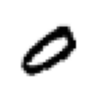

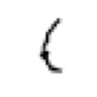

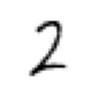

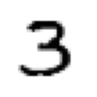

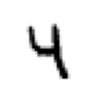

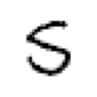

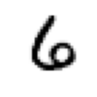

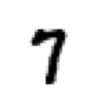

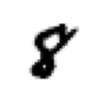

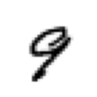

In [ ]:
for i in range(0,10):
  show_image(train_ds[i][0])

In [ ]:
test_ds = []
train_ds = []

def populate(l,_path):
  for p in _path.ls().sorted():
    l.append([tensor(Image.open(x)) for x in p.ls()])

In [ ]:
populate(train_ds,(mnist_path/'training/'))
populate(test_ds,(mnist_path/'testing/'))
type(train_ds[0][0])

torch.Tensor

In [ ]:
test_ds = [torch.stack(x) for x in test_ds]
train_ds = [torch.stack(x) for x in train_ds]


In [ ]:
for i in range(0,10):
  print(i,f" training set has {train_ds[i].shape[0]} samples")

0  training set has 5923 samples
1  training set has 6742 samples
2  training set has 5958 samples
3  training set has 6131 samples
4  training set has 5842 samples
5  training set has 5421 samples
6  training set has 5918 samples
7  training set has 6265 samples
8  training set has 5851 samples
9  training set has 5949 samples


In [ ]:
# data standardization -> scale to 0-1
test_ds = [x/255 for x in test_ds]
train_ds = [x/255 for x in train_ds]


In [ ]:
train_ds[0].max(),train_ds[0].min(),train_ds[0].ndim,train_ds[0].shape

(tensor(1.), tensor(0.), 3, torch.Size([5923, 28, 28]))

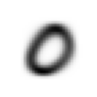

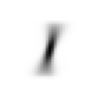

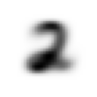

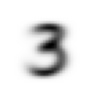

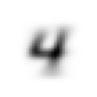

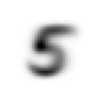

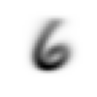

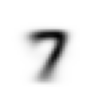

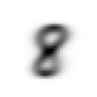

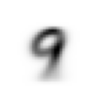

In [ ]:
means = [x.mean(0) for x in train_ds]
for x in means:
  show_image(x)

In [ ]:
from torch.nn.functional import mse_loss

In [ ]:
for i,(t,m) in enumerate(zip(train_ds,means)):
  print(i,F.mse_loss(t,m).sqrt())

0 tensor(0.2523)
1 tensor(0.1693)
2 tensor(0.2545)
3 tensor(0.2394)
4 tensor(0.2283)
5 tensor(0.2464)
6 tensor(0.2344)
7 tensor(0.2186)
8 tensor(0.2412)
9 tensor(0.2218)


<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([5923, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(i,F.mse_loss(t,m).sqrt())
<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([6742, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(i,F.mse_loss(t,m).sqrt())
<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([5958, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(i,F.mse_loss(t,m).sqrt())
<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the in

In [ ]:
def mnist_distance(a,b):
  l1=((a-b).abs()).mean((-1,-2))
  print(a.shape,b.shape,l1.shape)
  return l1

In [ ]:
results = {}
for i in range(0,10):
  results[i]={}
  for j in range(0,10):
      results[i][j] = mnist_distance(test_ds[i],means[j])


torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([113

In [ ]:
for i in range(0,10):
  for j in range(1,10):
    assert results[i][j].shape==results[i][j-1].shape

In [ ]:
result_final = []

for i in range(10):
    leni = len(results[i][0])
    result_i = []
    for sample in range(leni):
        min_j = min(range(10), key=lambda j: results[i][j][sample])
        result_i.append(min_j == i)
    result_final.append(np.array(result_i))  # note: converting each list to np.array

In [ ]:
result_final2 = [
    [
        (min(range(10), key=lambda j: results[i][j][sample]) == i)
        for sample in range(len(results[i][0]))
    ]
    for i in range(10)
]

In [ ]:
for x,y in zip (result_final,result_final2):
  for r,l in zip(x,y):
    assert r==l

In [ ]:
for x in range(10):
  correct = 0
  for item in result_final[x]:
    if item==True:
      correct+=1
  print(f"accuracy for {x} is {correct/len(result_final[x])}")

accuracy for 0 is 0.8153061224489796
accuracy for 1 is 0.9982378854625551
accuracy for 2 is 0.42344961240310075
accuracy for 3 is 0.6089108910891089
accuracy for 4 is 0.6680244399185336
accuracy for 5 is 0.32623318385650224
accuracy for 6 is 0.7870563674321504
accuracy for 7 is 0.7645914396887159
accuracy for 8 is 0.44250513347022585
accuracy for 9 is 0.77601585728444


In [ ]:
for x in range(10):
  print(np.mean(result_final[x]))

0.8153061224489796
0.9982378854625551
0.42344961240310075
0.6089108910891089
0.6680244399185336
0.32623318385650224
0.7870563674321504
0.7645914396887159
0.44250513347022585
0.77601585728444


Now we have baseline numbers using mean of accuracy using mean as the measure of performace

Next will try same using a NN

In [ ]:
xt = tensor([1.,2.,3.]).requires_grad_()
def f(x): return (x**2).sum()
yt = f(xt)

In [ ]:
yt.backward()
xt.grad

tensor([2., 4., 6.])

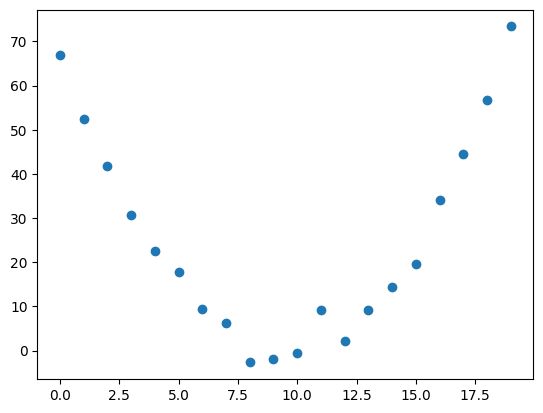

In [ ]:
time = torch.arange(0,20).float();
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [ ]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [ ]:
def l2(preds, targets): return ((preds-targets)**2).mean().sqrt()
params = torch.randn(3).requires_grad_()

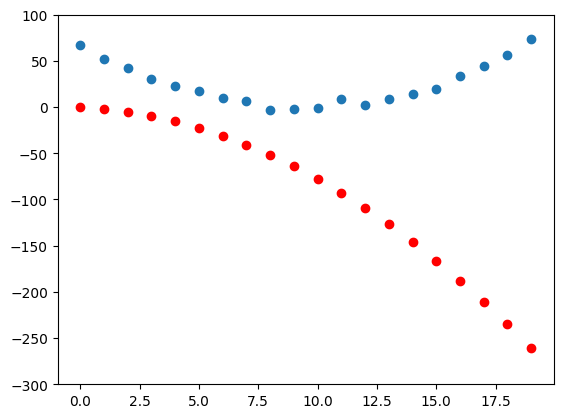

In [ ]:
preds = f(time, params)
show_preds(preds)

In [ ]:
def apply_step(params, prn=True,lr=0.00001):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

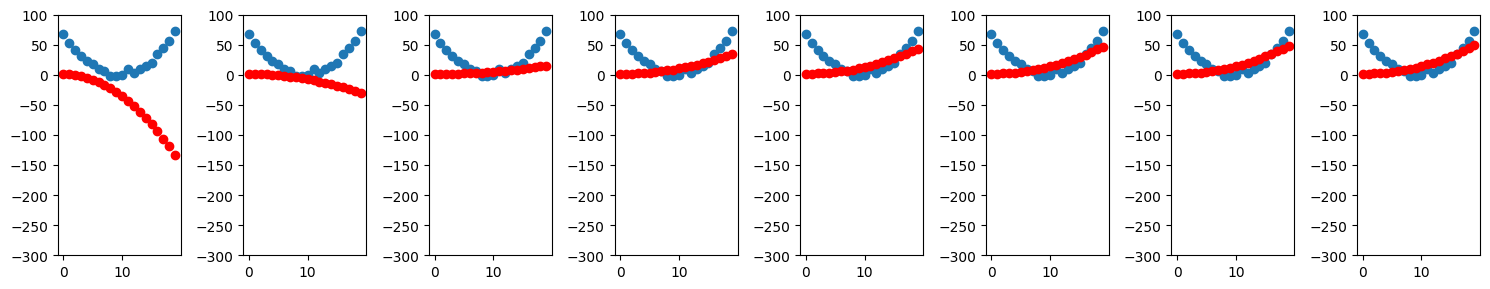

In [ ]:
params = torch.randn(3).requires_grad_()
_,axs = plt.subplots(1,8,figsize=(15,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

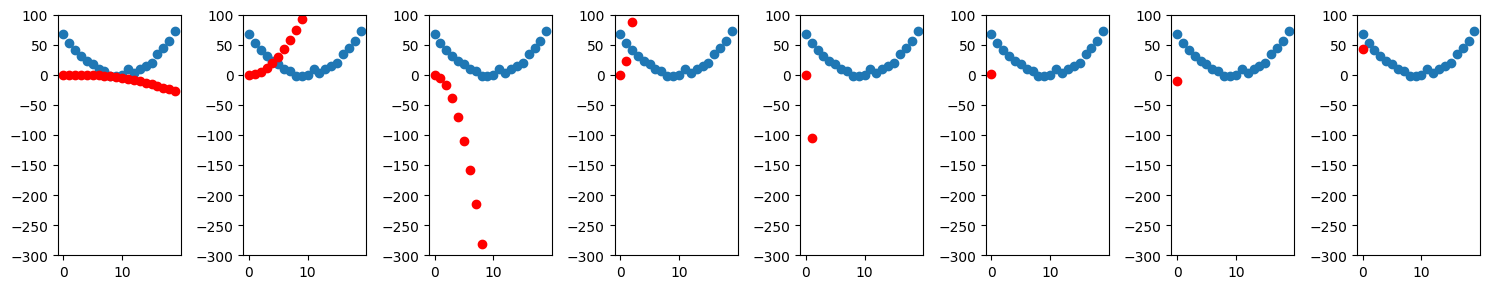

In [ ]:
#showing divergence
params = torch.randn(3).requires_grad_()
_,axs = plt.subplots(1,8,figsize=(15,3))
for ax in axs: show_preds(apply_step(params, False,lr=0.0001), ax)
plt.tight_layout()

MNIST

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape,stacked_sevens.shape,stacked_threes.shape

(torch.Size([1010, 28, 28]),
 torch.Size([1028, 28, 28]),
 torch.Size([6265, 28, 28]),
 torch.Size([6131, 28, 28]))

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y.shape

(torch.Size([784]), torch.Size([1]))

In [ ]:
def initialise_params(size):
  return torch.randn(size).requires_grad_()

In [ ]:
weights = initialise_params((28*28,1))
bias = initialise_params(1)

In [ ]:
def linear_layer(x,w,b):
  return x@w+b

In [ ]:
pred = linear_layer(train_x,weights,bias)
correct = (pred>0.5).float() == train_y

In [ ]:
correct.float().mean()

tensor(0.4109)

In [ ]:
# ^ random weights giving 41% accuracy

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

In [35]:
def plot_function(func, title, min=-4, max=4):
    x = torch.linspace(min, max, 100)
    y = func(x)
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

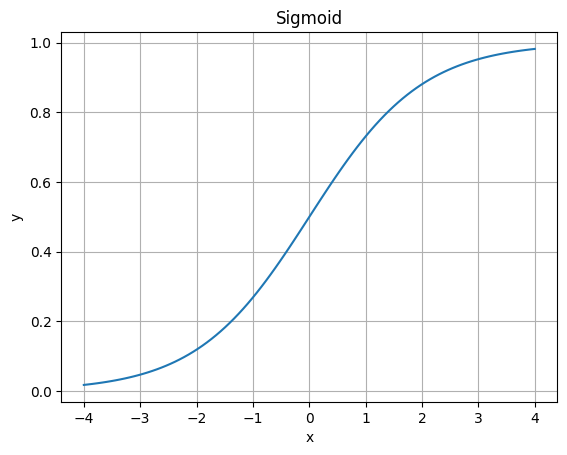

In [36]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [37]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [43]:
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset,batch_size=256)
weights = initialise_params((28*28,1))
bias = initialise_params(1)
def linear_layer(x):
  return x@weights+bias
def calc_grad(x, y, model):
    preds = model(x)
    loss = mnist_loss(preds, y)
    loss.backward()

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

def batch_accuracy(yp, y):
    preds = yp.sigmoid()
    correct = (preds>0.5) == y
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [44]:
lr = 1.
params = weights,bias
for i in range(20):
    train_epoch(linear_layer, lr, params)
    print(validate_epoch(linear_layer), end=' ')

0.7456 0.8887 0.9306 0.9467 0.9579 0.9662 0.9677 0.9682 0.9706 0.9706 0.9726 0.9736 0.974 0.975 0.9755 0.976 0.9775 0.9785 0.9789 0.9789 

In [51]:
linear_model = nn.Linear(28*28,1)
w,b= linear_model.parameters()
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

opt = BasicOptim(linear_model.parameters(), lr=0.1)

In [87]:
# used for batch
def model_func():
  return nn.Linear(28*28,1)

def accuracy(yp,y):
  correct = ((yp.sigmoid()>0.5).float()==y)
  return correct.float().mean()

def calc_grad(x, y, model):
    preds = model(x)
    loss = mnist_loss(preds, y)
    loss.backward()

def valid_accuracy(model):
    accs = [accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

def train_epoch(model,opt):
  for x,y in dl:
    calc_grad(x,y,model)
    opt.step()
    opt.zero_grad()
  print(valid_accuracy(model),end=' ')


In [91]:
model = model_func()
opt = BasicOptim(model.parameters(), lr=0.1)
w,b = model.parameters()
print(w.shape,b.shape)
def train_model(model,opt,iter):
  for i in range(iter):
    train_epoch(model,opt)
train_model(model,opt,20)

torch.Size([1, 784]) torch.Size([1])
0.54 0.8652 0.9326 0.9526 0.9633 0.9638 0.9657 0.9667 0.9677 0.9687 0.9692 0.9701 0.9706 0.9711 0.9716 0.9716 0.9716 0.9716 0.9716 0.9716 

In [93]:
# now replace optimizer by SGD implementation

model = model_func()
opt = SGD(model.parameters(),lr=0.1)
train_model(model,opt,20)

0.5459 0.8745 0.936 0.9536 0.9633 0.9633 0.9648 0.9667 0.9687 0.9687 0.9696 0.9701 0.9706 0.9716 0.9716 0.9716 0.9716 0.9716 0.9716 0.9716 

In [98]:
# now fitting it all into a learner class

datals = DataLoaders(dl, valid_dl)
learner = Learner(datals,model_func(),opt_func = SGD,lr=0.1,loss_func=mnist_loss,metrics=accuracy)

In [99]:
learner.fit(40)

epoch,train_loss,valid_loss,accuracy,time
0,0.232902,0.372041,0.547105,00:00
1,0.126433,0.187105,0.865064,00:00
2,0.085431,0.109228,0.934249,00:00
3,0.066204,0.080965,0.953876,00:00
4,0.055995,0.067255,0.963690,00:00
5,0.049925,0.059247,0.963690,00:00
6,0.045917,0.053988,0.965162,00:00
7,0.043029,0.050250,0.967615,00:00
8,0.040805,0.047442,0.968106,00:00
9,0.039010,0.045242,0.968597,00:00


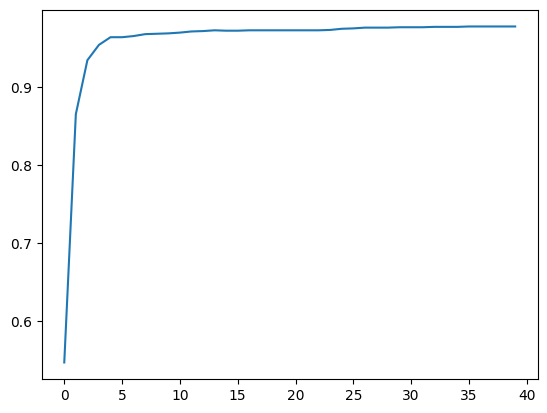

In [105]:
plt.plot(L(learner.recorder.values).itemgot(2));

In [101]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

learner2 = Learner(datals,simple_net,opt_func = SGD,lr=0.1,loss_func=mnist_loss,metrics=accuracy)
learner2.fit(40)

epoch,train_loss,valid_loss,accuracy,time
0,0.298347,0.419335,0.504416,00:00
1,0.142238,0.230081,0.804220,00:00
2,0.079518,0.116220,0.915113,00:00
3,0.052726,0.078822,0.939647,00:00
4,0.040243,0.061752,0.953876,00:00
5,0.033829,0.052081,0.964181,00:00
6,0.030122,0.045923,0.964671,00:00
7,0.027703,0.041687,0.966634,00:00
8,0.025952,0.038603,0.967615,00:00
9,0.024591,0.036248,0.969087,00:00


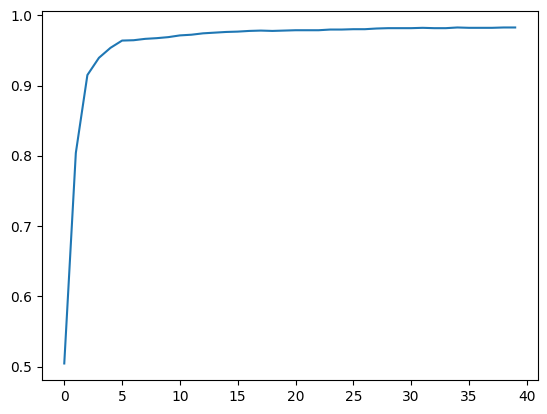

In [103]:
plt.plot(L(learner2.recorder.values).itemgot(2));

In [107]:
learner.recorder.values

[(#3) [0.23290184140205383,0.37204083800315857,0.5471050143241882],
 (#3) [0.1264326423406601,0.18710532784461975,0.8650637865066528],
 (#3) [0.085431307554245,0.10922802239656448,0.9342492818832397],
 (#3) [0.06620422750711441,0.08096526563167572,0.9538763761520386],
 (#3) [0.05599546432495117,0.06725496053695679,0.9636898636817932],
 (#3) [0.049924712628126144,0.05924733728170395,0.9636898636817932],
 (#3) [0.04591681435704231,0.053987979888916016,0.965161919593811],
 (#3) [0.04302883520722389,0.050250373780727386,0.9676153063774109],
 (#3) [0.040805090218782425,0.04744180664420128,0.9681059718132019],
 (#3) [0.03900979459285736,0.045242391526699066,0.9685966372489929],
 (#3) [0.037511467933654785,0.04346451908349991,0.9695780277252197],
 (#3) [0.036230992525815964,0.04199086129665375,0.9710500240325928],
 (#3) [0.03511739894747734,0.04074428603053093,0.9715407490730286],
 (#3) [0.03413581848144531,0.03967190161347389,0.9725220799446106],
 (#3) [0.033261243253946304,0.038736261427402

In [111]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,time
0,0.135501,0.008845,00:14
